# Iris Flower Species Analysis And Prediction By Data Science And Machine Learning..

## Created And Done By:-Anubhav Kumar Gupta

### Libraries Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as spy

### Data Acquisition

In [2]:
df_iris=pd.read_csv('/work/Iris.csv')
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Shape Of Dataset

In [3]:
df_iris.shape

(150, 6)

### First 5 Rows

In [4]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Last 5 Rows

In [5]:
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Columns Name

In [6]:
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Check NaN Values

In [7]:
df_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Information

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Datatypes 

In [9]:
df_iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Memory Usage

In [10]:
df_iris.memory_usage()

Index             128
Id               1200
SepalLengthCm    1200
SepalWidthCm     1200
PetalLengthCm    1200
PetalWidthCm     1200
Species          1200
dtype: int64

### Descriptive Stats

In [11]:
df_iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


### Species Valuecounts

In [12]:
df_iris[['Species']].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Grouping By Species

In [13]:
df_iris_species_group=df_iris.groupby(['Species']).agg({'SepalLengthCm':['max','min','mean','median','std','var'],
'SepalWidthCm':['max','min','mean','median','std','var'],'PetalLengthCm':['max','min','mean','median','std','var'],
'PetalWidthCm':['max','min','mean','median','std','var']})
df_iris_species_group.transpose()

Species               Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm max        5.800000         7.000000        7.900000
              min        4.300000         4.900000        4.900000
              mean       5.006000         5.936000        6.588000
              median     5.000000         5.900000        6.500000
              std        0.352490         0.516171        0.635880
              var        0.124249         0.266433        0.404343
SepalWidthCm  max        4.400000         3.400000        3.800000
              min        2.300000         2.000000        2.200000
              mean       3.418000         2.770000        2.974000
              median     3.400000         2.800000        3.000000
              std        0.381024         0.313798        0.322497
              var        0.145180         0.098469        0.104004
PetalLengthCm max        1.900000         5.100000        6.900000
              min        1.000000         3.000000        4.500000
              mean       1.464000         4.260000        5.552000
              median     1.500000         4.350000        5.550000
              std        0.173511         0.469911        0.551895
              var        0.030106         0.220816        0.304588
PetalWidthCm  max        0.600000         1.800000        2.500000
              min        0.100000         1.000000        1.400000
              mean       0.244000         1.326000        2.026000
              median     0.200000         1.300000        2.000000
              std        0.107210         0.197753        0.274650
              var        0.011494         0.039106        0.075433

### Finding Correlation B/W [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] which are Predictor And Independent Variable By Pearson Correlation

In [14]:
print('Correlation b/w SepalLengthCm & SepalWidthCm =',spy.pearsonr(df_iris['SepalLengthCm'],df_iris['SepalWidthCm']))
print('Correlation b/w SepalLengthCm & PetalLengthCm =',spy.pearsonr(df_iris['SepalLengthCm'],df_iris['PetalLengthCm']))
print('Correlation b/w SepalLengthCm & PetalWidthCm =',spy.pearsonr(df_iris['SepalLengthCm'],df_iris['PetalWidthCm']))
print('Correlation b/w SepalWidthCm & PetalLengthCm =',spy.pearsonr(df_iris['SepalWidthCm'],df_iris['PetalLengthCm']))
print('Correlation b/w SepalWidthCm & PetalWidthCm =',spy.pearsonr(df_iris['SepalWidthCm'],df_iris['PetalWidthCm']))
print('Correlation b/w PetalLengthCm & PetalWidthCm =',spy.pearsonr(df_iris['PetalLengthCm'],df_iris['PetalWidthCm']))

Correlation b/w SepalLengthCm & SepalWidthCm = PearsonRResult(statistic=-0.10936924995064938, pvalue=0.1827652152713699)
Correlation b/w SepalLengthCm & PetalLengthCm = PearsonRResult(statistic=0.8717541573048714, pvalue=1.0384540627940487e-47)
Correlation b/w SepalLengthCm & PetalWidthCm = PearsonRResult(statistic=0.8179536333691635, pvalue=2.3148491512728037e-37)
Correlation b/w SepalWidthCm & PetalLengthCm = PearsonRResult(statistic=-0.4205160964011545, pvalue=8.429366392950231e-08)
Correlation b/w SepalWidthCm & PetalWidthCm = PearsonRResult(statistic=-0.3565440896138058, pvalue=7.523890956067452e-06)
Correlation b/w PetalLengthCm & PetalWidthCm = PearsonRResult(statistic=0.9627570970509662, pvalue=5.776660988495143e-86)


### Test For Significance Difference Of Mean B/W Iris-setosa,Iris-versicolor & Iris-virginica By ANNOVA

#### For Iris-setosa

In [15]:
Iris_setosa_sepallength=df_iris[df_iris['Species']=='Iris-setosa']['SepalLengthCm']
Iris_setosa_sepalwidth=df_iris[df_iris['Species']=='Iris-setosa']['SepalWidthCm']
Iris_setosa_petallength=df_iris[df_iris['Species']=='Iris-setosa']['PetalLengthCm']
Iris_setosa_petalwidth=df_iris[df_iris['Species']=='Iris-setosa']['PetalWidthCm']
print('Annova is',spy.f_oneway(Iris_setosa_sepallength,Iris_setosa_sepalwidth,Iris_setosa_petallength,Iris_setosa_petalwidth))

Annova is F_onewayResult(statistic=2846.734398922159, pvalue=2.7309587644511225e-161)


#### For Iris-versicolor

In [16]:
Iris_versicolor_sepallength=df_iris[df_iris['Species']=='Iris-versicolor']['SepalLengthCm']
Iris_versicolor_sepalwidth=df_iris[df_iris['Species']=='Iris-versicolor']['SepalWidthCm']
Iris_versicolor_petallength=df_iris[df_iris['Species']=='Iris-versicolor']['PetalLengthCm']
Iris_versicolor_petalwidth=df_iris[df_iris['Species']=='Iris-versicolor']['PetalWidthCm']
print('Annova is',spy.f_oneway(Iris_versicolor_sepallength,Iris_versicolor_sepalwidth,Iris_versicolor_petallength,
Iris_versicolor_petalwidth))

Annova is F_onewayResult(statistic=1253.6380153556045, pvalue=1.3770621813910734e-127)


#### For Iris-virginica

In [17]:
Iris_virginica_sepallength=df_iris[df_iris['Species']=='Iris-virginica']['SepalLengthCm']
Iris_virginica_sepalwidth=df_iris[df_iris['Species']=='Iris-virginica']['SepalWidthCm']
Iris_virginica_petallength=df_iris[df_iris['Species']=='Iris-virginica']['PetalLengthCm']
Iris_virginica_petalwidth=df_iris[df_iris['Species']=='Iris-virginica']['PetalWidthCm']
print('Annova is',spy.f_oneway(Iris_virginica_sepallength,Iris_virginica_sepalwidth,Iris_virginica_petallength,
Iris_virginica_petalwidth))

Annova is F_onewayResult(statistic=1030.422084386245, pvalue=1.0660822234135073e-119)


### Boxplot Of [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] which are Predictor And Independent Variable

##### For SepalLength

<AxesSubplot: ylabel='SepalLengthCm'>

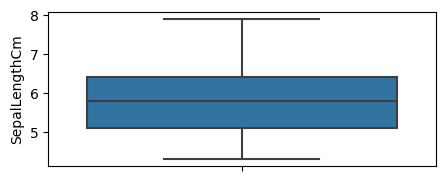

In [18]:
plt.figure(figsize=(5,2))
sns.boxplot(y='SepalLengthCm',data=df_iris)

##### For SepalWidth

<AxesSubplot: ylabel='SepalWidthCm'>

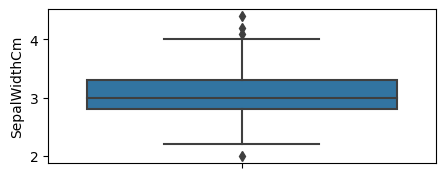

In [19]:
plt.figure(figsize=(5,2))
sns.boxplot(y='SepalWidthCm',data=df_iris)

##### For PetalLength

<AxesSubplot: ylabel='PetalLengthCm'>

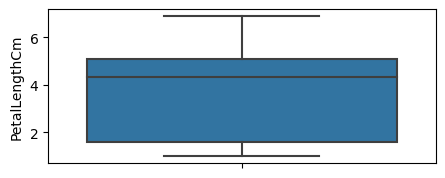

In [20]:
plt.figure(figsize=(5,2))
sns.boxplot(y='PetalLengthCm',data=df_iris)

##### For PetalWidth

<AxesSubplot: ylabel='PetalWidthCm'>

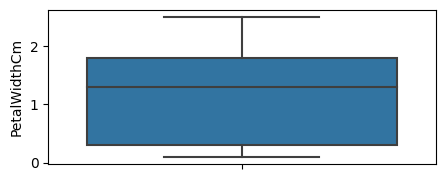

In [21]:
plt.figure(figsize=(5,2))
sns.boxplot(y='PetalWidthCm',data=df_iris)

#### Frequency Plot Of [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] which are Predictor And Independent Variable

##### For SepalLength

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

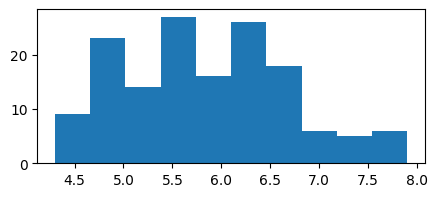

In [22]:
plt.figure(figsize=(5,2))
plt.hist(df_iris['SepalLengthCm'])

##### For Sepalwidth

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

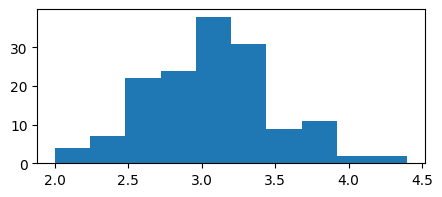

In [23]:
plt.figure(figsize=(5,2))
plt.hist(df_iris['SepalWidthCm'])

##### For PetalLength

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

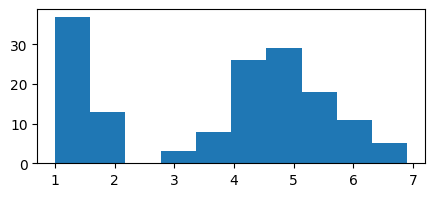

In [24]:
plt.figure(figsize=(5,2))
plt.hist(df_iris['PetalLengthCm'])

##### For PetalWidth

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

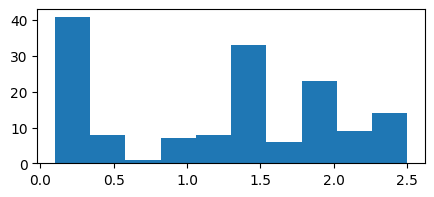

In [25]:
plt.figure(figsize=(5,2))
plt.hist(df_iris['PetalWidthCm'])

### Taking x as Predictor And Independent Variable And Storing Features [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] In It To Predict [['Species']]

In [26]:
x=df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

### Taking y as Target And Dependent Variable And Storing Feature [['Species']] In It

In [27]:
y=df_iris[['Species']]

### Train-Test Split For M.L.

In [28]:
from sklearn.model_selection import train_test_split

### Spliting Dataset 80% For Training And 20% For Testing

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Shape Of Train And Test Dataset

In [30]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(120, 4) (120, 1)
(30, 4) (30, 1)


### By K-Nearest Neighbors(KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

### Fitting Of KNN

In [32]:
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

### Predicting Species By KNN

In [33]:
y_pred_KNN=KNN.predict(x_test)

### Predicted Species By KNN

In [34]:
y_pred_KNN

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

### Accuracy Score Import

In [35]:
from sklearn.metrics import accuracy_score

### Accuracy Score For KNN

In [36]:
y_pred_KNN_accuracy=accuracy_score(y_test,y_pred_KNN)
y_pred_KNN_accuracy

1.0

### By Decision Tree Classifier(DTC)

In [37]:
from sklearn.tree import DecisionTreeClassifier

### Fitting Of DTC

In [38]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

### Predicting Species By DTC

In [39]:
y_pred_DTC=DTC.predict(x_test)

### Predicted Species By DTC

In [40]:
y_pred_DTC

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

### Accuracy Score For DTC

In [41]:
y_pred_DTC_accuracy=accuracy_score(y_test,y_pred_DTC)
y_pred_DTC_accuracy

1.0

### By Logistic Regression(LR)

In [42]:
from sklearn.linear_model import LogisticRegression

### Fitting Of LR

In [43]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting Species By LR

In [44]:
y_pred_LR=LR.predict(x_test)

### Predicted Species By LR

In [45]:
y_pred_LR

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

### Accuracy Score For LR

In [46]:
y_pred_LR_accuracy=accuracy_score(y_test,y_pred_LR)
y_pred_LR_accuracy

1.0

### By Support Vector Machine(SVM)

In [47]:
from sklearn.svm import SVC

### Fitting Of SVM

In [48]:
svc=SVC()
svc.fit(x_train,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Predicting Species By SVM

In [49]:
y_pred_SVM=svc.predict(x_test)

### Predicted Species By SVM

In [50]:
y_pred_SVM_accuracy=accuracy_score(y_test,y_pred_SVM)
y_pred_SVM_accuracy

1.0

### By Random Forest Classifier(RFC)

In [51]:
from sklearn.ensemble import RandomForestClassifier

### Fitting Of RFC

In [52]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

/tmp/ipykernel_399/926610623.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(x_train,y_train)


RandomForestClassifier()

### Predicting Species By RFC

In [53]:
y_pred_RFC=RFC.predict(x_test)

### Predicted Species By RFC

In [54]:
y_pred_RFC

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

### Accuracy Score For RFC 

In [55]:
y_pred_RFC_accuracy=accuracy_score(y_test,y_pred_RFC)
y_pred_RFC_accuracy

1.0

### By Gaussian Naive Bayes(GNB) 

In [56]:
from sklearn.naive_bayes import GaussianNB

### Fitting Of GNB

In [57]:
GNB=GaussianNB()
GNB.fit(x_train,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Predicting Species By GNB

In [58]:
y_pred_GNB=GNB.predict(x_test)

### Predicted Species By GNB

In [59]:
y_pred_GNB

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype='<U15')

### Accuracy Score For GNB

In [60]:
y_pred_GNB_accuracy=accuracy_score(y_test,y_pred_GNB)
y_pred_GNB_accuracy

1.0

### Accuracy Score For All Models

In [61]:
df_accuracy_all=pd.DataFrame({'K-Nearest Neighbors(KNN)':[y_pred_KNN_accuracy],'Decision Tree Classifier(DTC)':[y_pred_DTC_accuracy],
'Logistic Regression(LR)':[y_pred_LR_accuracy],'Support Vector Machine(SVM)':[y_pred_SVM_accuracy],
'Random Forest Classifier(RFC)':[y_pred_RFC_accuracy],'Gaussian Naive Bayes(GNB)':[y_pred_GNB_accuracy]},
index=['Accuracy Score For All Models'])
df_accuracy_all.transpose()

,Accuracy Score For All Models
K-Nearest Neighbors(KNN),1.0
Decision Tree Classifier(DTC),1.0
Logistic Regression(LR),1.0
Support Vector Machine(SVM),1.0
Random Forest Classifier(RFC),1.0
Gaussian Naive Bayes(GNB),1.0


### Outcome Of Analysis And Prediction:-

#### 1)There are 3 species of iris flower in dataset which are iris setosa,iris versicolor & iris virginica.
#### 2)There is no correlation b/w [['SepalLengthCm', 'SepalWidthCm',]] because the p values for it is greater than 0.1 but other features(columns) are strongly correlated because the p values for them is less than 0.001.
#### 3)There is significance difference b/w mean of 3 species of iris flower which are iris setosa,iris versicolor & iris virginica because the p value for all of them is less than 0.05 i.e. alternate hypothesis is accepted and null hypothesis is rejected.
#### 4)K-Nearest Neighbors(KNN),Decision Tree Classifier(DTC),Logistic Regression(LR),Support Vector Machine(SVM),Random Forest Classifier(RFC),Gaussian Naive Bayes(GNB) are the best Classification models to predict Species because the accuracy score of all models is 100% i.e. the actual and predicted test values are totally similar to each other for each Classification model..

### Regards And Thanks,

#### Anubhav Kumar Gupta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bcf88236-9bde-4c84-b0de-fe2a73653ba7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>